# Introduction
This Jupyter notebook contains the expirements for Massively Parallel Algorithms to study the behavior of Affinity Clustering.

In [3]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import AffinityClustering as ACC

from datetime import datetime

from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext

## Data preparation

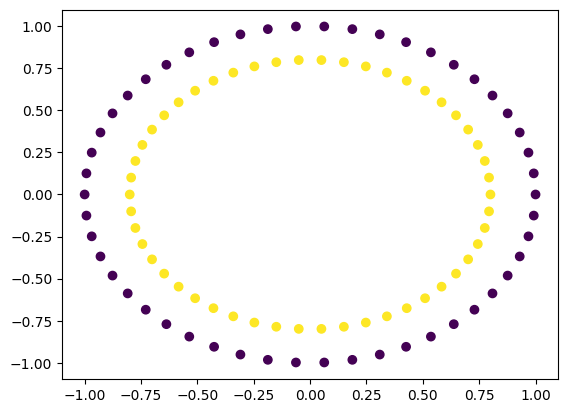

In [14]:
X, y = make_circles()


plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
ac = ACC.affinity_clustering()

## Read data

In [ ]:
# Read data
# data_reader = DataReader()
# loc = 'datasets/sklearn/data_two_circles.csv'
# V, n, E = data_reader.read_data_set_from_csvfile(loc)
# print('Read dataset: ', loc)




X = StandardScaler().fit_transform(X)




In [ ]:
conf = SparkConf().setAppName('MST_algo')
sc = SparkContext.getOrCreate(conf=conf)

n = len(X)
c = 0
epsilon = 0

k = math.ceil(n ** ((c - epsilon) / 2))
print("k: ", k)

U, V = partion_vertices(V, k)

rddUV = sc.parallelize(U)\
    .cartesian(sc.parallelize(V))\
        .map(lambda x: get_edges(x[0], x[1], E))\
            .map(lambda x: (find_mst(x[0], x[1]), x[2]))

both = rddUV.collect()


ImportError: cannot import name 'SparkConf' from 'pyspark.sql' (/Users/glovali/repos/MSTforDenseGraphs/mpa_ml/lib/python3.13/site-packages/pyspark/sql/__init__.py)

In [ ]:
def get_clustering_data():
    """
    Retrieves all toy datasets from sklearn
    :return: circles, moons, blobs datasets.
    """
    n_samples = 1500
    noisy_circles = make_circles(n_samples=n_samples, factor=.5,
                                 noise=0.05)
    noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
    blobs = make_blobs(n_samples=n_samples, random_state=8)
    no_structure = np.random.rand(n_samples, 2), None

    # Anisotropicly distributed data
    random_state = 170
    X, y = make_blobs(n_samples=n_samples, random_state=random_state)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)
    aniso = (X_aniso, y)

    # blobs with varied variances
    varied = make_blobs(n_samples=n_samples,
                        cluster_std=[1.0, 2.5, 0.5],
                        random_state=random_state)

    plt.figure(figsize=(9 * 2 + 3, 13))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                        hspace=.01)

    swiss_roll = make_swiss_roll(n_samples, noise=0.05)

    s_shape = make_s_curve(n_samples, noise=0.05)

    datasets = [
        (noisy_circles, {'damping': .77, 'preference': -240,
                         'quantile': .2, 'n_clusters': 2,
                         'min_samples': 20, 'xi': 0.25}),
        (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
        (varied, {'eps': .18, 'n_neighbors': 2,
                  'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
        (aniso, {'eps': .15, 'n_neighbors': 2,
                 'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
        (blobs, {}),
        (no_structure, {}),
        (swiss_roll, {}),
        (s_shape, {})]

    return datasets